# Метод опорных векторов (SVM)
## Опорные объекты

- Загрузите выборку из файла svm-data.csv. В нем записана двумерная выборка (целевая переменная указана в первом столбце, признаки — во втором и третьем).
- Обучите классификатор с линейным ядром, параметром C = 100000 и random_state=241. Такое значение параметра нужно использовать, чтобы убедиться, что SVM работает с выборкой как с линейно разделимой. При более низких значениях параметра алгоритм будет настраиваться с учетом слагаемого в функционале, штрафующего за маленькие отступы, из-за чего результат может не совпасть с решением классической задачи SVM для линейно разделимой выборки.
- Найдите номера объектов, которые являются опорными (нумерация с единицы). Они будут являться ответом на задание. Обратите внимание, что в качестве ответа нужно привести номера объектов в возрастающем порядке через запятую или пробел. Нумерация начинается с 1.

In [1]:
import pandas as pd
import numpy as np

from sklearn.svm import SVC
import matplotlib.pyplot as plt

# коэффициент С и тип ядра kernel. В данной задаче kernel='linear'
# Индексы опорных объектов обученного классификатора хранятся в поле support_

In [44]:
data = pd.read_csv('svm-data.csv', header=None)
X = data.loc[:, 1:]
y = data[0]

svm_model = SVC(C=100000, random_state=241, kernel='linear')
svm_model.fit(X,y)

print(svm_model.support_ + 1)

[ 4  5 10]


In [27]:
def plot_svc_decision_function(model,ax=None, plot_support=True):
    """ строим график решающей функции для двумерной SVC """
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # создаем координатную сетку для оценки модели
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)    
    Y, X = np.meshgrid(y,x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = svm_model.decision_function(xy).reshape(X.shape)
    
    # рисуем границы принятия решений и отступы
    ax.contour(X, Y, P, colors='k',
              levels=[-1,0,1], alpha=0.5,
              linestyles=['--', '-', '--'])
    
    # рисуем опорные векторы
    if plot_support:
        ax.scatter(svm_model.support_vectors_[:,0],
                  svm_model.support_vectors_[:,1],
                  s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

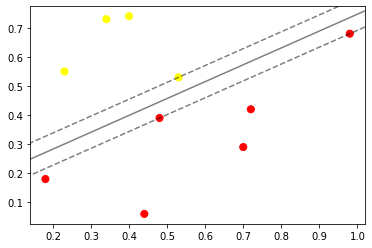

In [22]:
plt.scatter(X.iloc[:,0], X.iloc[:,1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(svm_model)